# The Challenge
**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

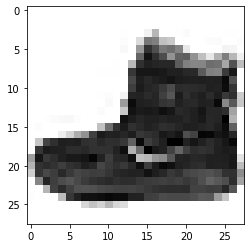

In [3]:
plt.imshow(x_train[0],cmap='binary')

In [4]:
x_train = x_train / 255

In [5]:
x_test = x_test / 255

In [6]:
from tensorflow.keras.utils import to_categorical

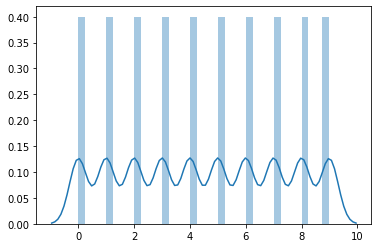

In [7]:
sns.distplot(y_train)

In [8]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [9]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [10]:
# reshape the x values to have the color channel of 1

x_train = x_train.reshape(60000, 28, 28,1)

In [25]:
x_train[4]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.10196078],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.74117647],
        [0.80784314],
        [0.73333333],
        [0.1254902 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.10196078],
        [0.85098039],
        

In [12]:
x_test = x_test.reshape(10000, 28, 28,1)

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
# BUILD THE MODEL

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,AveragePooling2D,Dropout

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [84]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))

# OUTPUT LAYER -- MULTI-CLASS CLASSIFICATION ---> softmax
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=6)

In [85]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=40,
         callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 25s 413us/sample - loss: 0.5074 - accuracy: 0.8130 - val_loss: 0.3798 - val_accuracy: 0.8611
Epoch 2/40
60000/60000 [==============================] - 24s 401us/sample - loss: 0.3466 - accuracy: 0.8713 - val_loss: 0.3196 - val_accuracy: 0.8822
Epoch 3/40
60000/60000 [==============================] - 24s 405us/sample - loss: 0.2981 - accuracy: 0.8897 - val_loss: 0.3000 - val_accuracy: 0.8879
Epoch 4/40
60000/60000 [==============================] - 24s 408us/sample - loss: 0.2665 - accuracy: 0.9015 - val_loss: 0.2825 - val_accuracy: 0.8975
Epoch 5/40
60000/60000 [==============================] - 24s 402us/sample - loss: 0.2435 - accuracy: 0.9082 - val_loss: 0.2871 - val_accuracy: 0.8922
Epoch 6/40
60000/60000 [==============================] - 22s 359us/sample - loss: 0.2223 - accuracy: 0.9169 - val_loss: 0.2652 - val_accuracy: 0.9004
Epoch 7/40
60000/60000 [====================

In [92]:
model.save('Fashion_MNIST_92perc_acc.h5')

In [86]:
metrics = pd.DataFrame(model.history.history)

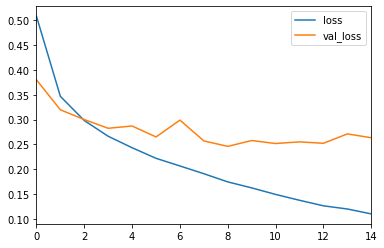

In [87]:
metrics[['loss','val_loss']].plot()

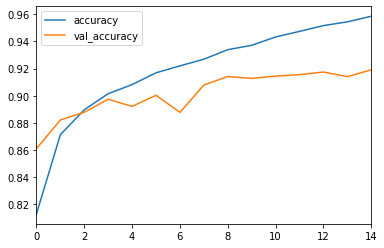

In [88]:
metrics[['accuracy','val_accuracy']].plot()

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [89]:
predictions = model.predict_classes(x_test)

In [90]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.88      0.87      1000
           3       0.92      0.93      0.92      1000
           4       0.88      0.88      0.88      1000
           5       0.97      0.99      0.98      1000
           6       0.77      0.77      0.77      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



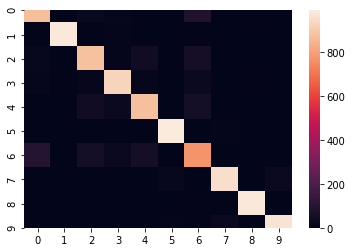

In [91]:
sns.heatmap(confusion_matrix(y_test,predictions))

In [81]:
num = x_test[np.random.randint(0,len(x_test))].reshape(1,28,28,1)

In [82]:
model.predict_classes(num)

array([6], dtype=int64)

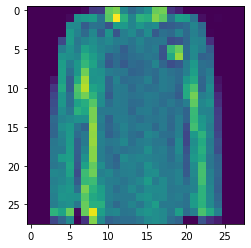

In [83]:
plt.imshow(num.reshape(28,28))